# Problem 1
When  $A -> B$ as simple reaction with the rate $-r_A = k C_A$ and the solution for A could be found in this way:
$\dfrac{d C_A}{dt} = -k C_A(t)$
$C_{A0} = 10$ mole/L


/Users/bazilevs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


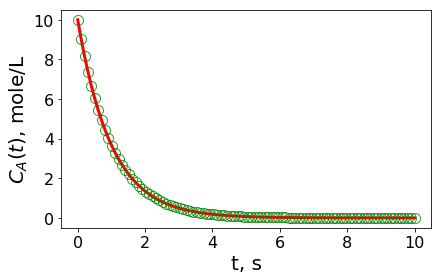

In [96]:
import matplotlib.pyplot as plt # plotting modules
%matplotlib inline 
plt.style.use('presentation') # just have in your script for prettier plotting
# insted of 'presentation' you can use 'ggplot'
import numpy as np # our matlab-like module
from scipy.integrate import odeint # integration of ODEs so you don't have to write your finite difference yourself

#step 1 definition of the function:

def f(C_A, t):
    dcadt = - k*C_A
    return dcadt

k = 1
C_A0 = 10.    
time_start = 0.
time_finish = 10000. 
N_points = 100
time_array = np.linspace(0, 10., N_points)

C_analyt = C_A0*np.exp(-k*time_array)

C_num = odeint(f,C_A0, time_array)

plt.plot(time_array, C_analyt, 'r-')
plt.plot(time_array, C_analyt, 'go', alpha=0.8, fillstyle='none') # alpha - 80% transparency
# fillstyle - none - means no filling of the circles
plt.xlabel('t, s')
plt.ylabel('$C_A(t)$, mole/L')
plt.show()


Now the same thing for B
$ -(r_B) = -(-r_A) = - k C_A$
so the design equation will have an additional equation:

$\dfrac{d C_B}{dt} = k C_A(t)$
$C_{B0} = 0$ mol/L


(100, 2)


/Users/bazilevs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


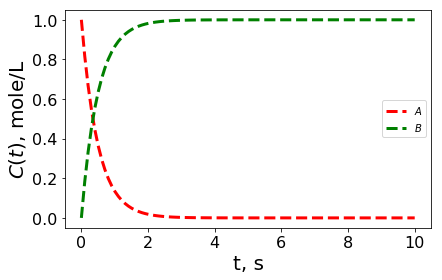

In [22]:
import matplotlib.pyplot as plt # plotting modules
%matplotlib inline 
plt.style.use('presentation') # just have in your script for prettier plotting
# insted of 'presentation' you can use 'ggplot'
import numpy as np # our matlab-like module
from scipy.integrate import odeint # integration of ODEs so you don't have to write your finite difference yourself

#step 1 definition of the function:

def f(C_list, t):
    C_A = C_list[0]
    C_B = C_list[1]
    dcadt = - k*C_A
    dcbdt = k*C_A
    return [dcadt, dcbdt]

k = 2
C_A0 = 10.    
C_B0 = 0.
time_start = 0.
time_finish = 10. 
N_points = 100
time_array = np.linspace(0, 10., N_points)

C0_list = [1, 0.]
C_num_list = odeint(f, C0_list, time_array)

print(C_num_list.shape)

C_A_num = C_num_list[:,0]
C_B_num = C_num_list[:,1]

plt.plot(time_array, C_A_num, 'r--', fillstyle='none', label='$A$')
plt.plot(time_array, C_B_num, 'g--', fillstyle='none', label='$B$') 

plt.xlabel('t, s')
plt.ylabel('$C(t)$, mole/L')
plt.legend()
plt.show()

# C_analyt = C_A0*np.exp(-k*time_array)

# C_num = odeint(f,C_A0, time_array)


In [16]:
C_num_list[:,0]

array([ 1.00000000e+01,  1.33716030e-08, -3.62401330e-11, -7.02789445e-12,
       -7.10567033e-13, -4.29853336e-14, -4.01868466e-14, -3.73883596e-14,
       -3.45898726e-14, -3.17913856e-14, -2.89928986e-14, -2.61944116e-14,
       -2.33959246e-14, -2.05974376e-14, -1.77989506e-14, -1.50004636e-14,
       -1.22019766e-14, -9.40348960e-15, -6.60500260e-15, -3.80651560e-15,
       -1.00802861e-15, -1.31043856e-16, -1.22262822e-16, -1.13481787e-16,
       -1.04700753e-16, -9.59197192e-17, -8.71386851e-17, -7.83576509e-17,
       -6.95766168e-17, -6.07955827e-17, -5.20145486e-17, -4.32335144e-17,
       -3.44524803e-17, -2.56714462e-17, -1.68904121e-17, -8.10937793e-18,
       -4.29817942e-19, -4.27054803e-19, -4.24291663e-19, -4.21528523e-19,
       -4.18765383e-19, -4.16002243e-19, -4.13239104e-19, -4.10475964e-19,
       -4.07712824e-19, -4.04949684e-19, -4.02186544e-19, -3.99423405e-19,
       -3.96660265e-19, -3.93897125e-19])

# Problem 2

A system of ODES

$ A + B \to C$, $k_1 = 1$ L/(mol s)

$ B + C \to D$, $k_1 = 1.5$ L/(mol s)

with initial concentrations 
$C_{A0} = 1$ mol/L
$C_{B0} = 1$ mol/L
$C_{C0} = 0$ mol/L
$C_{D0} = 0$ mol/L

1. Calculate concentration of each component
2. Calculate the selectivity parameters $S = \dfrac{C}{(C+D)}$, S(t=0) = 1.0


(100, 4)


/Users/bazilevs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


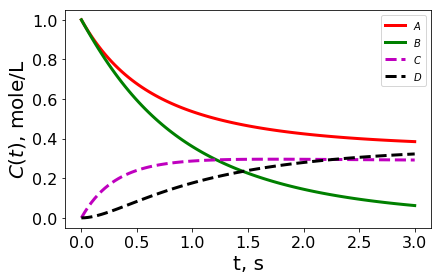

In [24]:
import matplotlib.pyplot as plt # plotting modules
%matplotlib inline 
plt.style.use('presentation') # just have in your script for prettier plotting
# insted of 'presentation' you can use 'ggplot'
import numpy as np # our matlab-like module
from scipy.integrate import odeint # integration of ODEs so you don't have to write your finite difference yourself

#step 1 definition of the function:

def f(C_list, t):

    k1 = 1.
    k2 = 1.5
    C_A = C_list[0]
    C_B = C_list[1]
    C_C = C_list[2]
    
    r1 = k1*C_A*C_B
    r2 = k2*C_B*C_C

    dcAdt = -r1
    dcBdt = -r1 - r2
    dcCdt = r1 - r2
    dcDdt = r2
    
    return [dcAdt,dcBdt,dcCdt,dcDdt]

k1 = 1.
k2 = 1.5

C0_list = [1.0, 1.0, 0.0, 0.0]

time_start = 0.
time_finish = 3. 
N_points = 100
time_array = np.linspace(0, 3., N_points)


C_num_list = odeint(f, C0_list, time_array)

print(C_num_list.shape)

C_A_num = C_num_list[:,0]
C_B_num = C_num_list[:,1]
C_C_num = C_num_list[:,2]
C_D_num = C_num_list[:,3]

plt.plot(time_array, C_A_num, 'r-', label='$A$')
plt.plot(time_array, C_B_num, 'g-', label='$B$') 
plt.plot(time_array, C_C_num, 'm--', label='$C$') 
plt.plot(time_array, C_D_num, 'k--', label='$D$') 

plt.xlabel('t, s')
plt.ylabel('$C(t)$, mole/L')
plt.legend()
plt.show()


/Users/bazilevs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


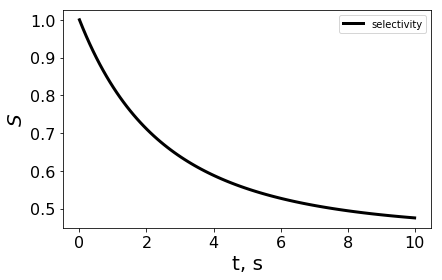

In [34]:
S = np.ones(len(C_C_num))
S[1:] = C_C_num[1:]/(C_C_num[1:] + C_D_num[1:])
plt.plot(time_array, S, 'k-',label='selectivity')
plt.xlabel('t, s')
plt.ylabel('$S$')
plt.legend()
plt.show()


here are more advanced equations:
https://www.youtube.com/watch?v=8-V5T40aMEc
https://www.youtube.com/watch?v=BRe7qKIAa34

zombie apocalypse:

http://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html


# Problem 4: Zombie apocalypse:

Imagine we live in the world of where a part of human population is infected and could take over the world.

S - Living people are Susceptible (S) victims, so they could be infected and become a zombie 

Z - Number of zombies, they could come from either infected people or 'ressurcted' dead people

R - rate by which people die

with the following notations:
```
S: the number of susceptible victims
Z: the number of zombies
R: the number of people "killed"
P: the population birth rate
d: the chance of a natural death
B: the chance the "zombie disease" is transmitted (an alive person becomes a zombie)
G: the chance a dead person is resurrected into a zombie
A: the chance a zombie is totally destroyed
```

There are different reactions happening at the same time: 


**Rate of accumulation of the living people (Susceptible victims)**

birth rate -> S (something is born -> S zeroth order reaction)

S -> Infected -> Z ( S + Z -> Z second order reaction with a constant B => $-r_S = B \cdot S \cdot Z$ )

S -> Dead ( S -> Dead, first  with the rate $-r_S = d \cdot S$) 

So the corresponding design equation will look like:

$\dfrac{\delta S}{dt} = P - B \cdot S \cdot Z - d \cdot S$


**Rate of accumulation of zombies**

S -> Infected -> Z ( S + Z -> Z second order reaction with a constant B => $-r_S = B \cdot S \cdot Z$ )

Dead person -> Z (resurrection of a dead person into a zombie, first order reaction with a constant R)

Z -> 0 (Killing of zombies by living people second order reaction S + Z -> 0 $-r_Z = A \cdot S \cdot Z$

$\dfrac{\delta Z}{dt} = B \cdot S \cdot Z + G \cdot R - A \cdot S \cdot Z$

**Rate of dieing** 

S -> Dead

S + Z -> 0

Dead -> Resurrected 

$\dfrac{\delta R}{dt} = d \cdot S + A \cdot S \cdot Z - G \cdot R$


Initial parameters
```
P = 0      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A = 0.0001  # destroy percent  (per day)
```

/Users/bazilevs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


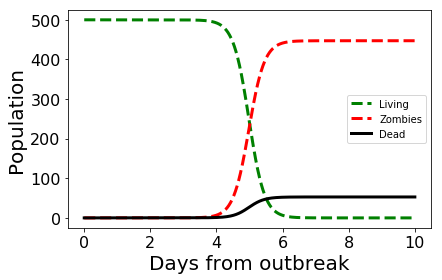

In [84]:

#zombie apolcalypse
import matplotlib.pyplot as plt # plotting modules
%matplotlib inline 
plt.style.use('presentation') 
# plt.style.use('ggplot') 
import numpy as np # our matlab-like module
from scipy.integrate import odeint # integration of ODEs so you don't have to write your finite difference yourself


P = 0.      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
# # B = 0.001  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
# # G = 0.1  # resurect percent (per day)
A = 0.001  # destroy percent  (per day)

# solve the system dy/dt = f(y, t)
def f(y, t):
     Si = y[0]
     Zi = y[1]
     Ri = y[2]
     # the model equations (see Munz et al. 2009)
     f0 = P - B*Si*Zi - d*Si
     f1 = B*Si*Zi + G*Ri - A*Si*Zi
     f2 = d*Si + A*Si*Zi - G*Ri
     return [f0, f1, f2]

# initial conditions
S0 = 500.              # initial population
Z0 = 0                 # initial zombie population
R0 = 0                 # initial death population
y0 = [S0, Z0, R0]     # initial condition vector
time_start = 0
time_finish = 10.
N_points = 1000
t  = np.linspace(time_start, time_finish, N_points)         # time grid

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S,'g--', label='Living')
plt.plot(t, Z,'r--', label='Zombies')
plt.plot(t, R,'k-', label='Dead')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
# plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)

In [1]:
from IPython.html.widgets import interact
from IPython.display import clear_output, display, HTML

def zombie(P= 0., d = 0.0001, B=0.0095, G=0.001, A=0.001):
    
    # solve the system dy/dt = f(y, t)
    def f(y, t):
         Si = y[0]
         Zi = y[1]
         Ri = y[2]
         # the model equations (see Munz et al. 2009)
         f0 = P - B*Si*Zi - d*Si
         f1 = B*Si*Zi + G*Ri - A*Si*Zi
         f2 = d*Si + A*Si*Zi - G*Ri
         return [f0, f1, f2]

    # initial conditions
    S0 = 500.              # initial population
    Z0 = 0                 # initial zombie population
    R0 = 0                 # initial death population
    y0 = [S0, Z0, R0]     # initial condition vector
    time_start = 0
    time_finish = 10.
    N_points = 1000
    t  = np.linspace(time_start, time_finish, N_points)         # time grid

    # solve the DEs
    soln = odeint(f, y0, t)
    S = soln[:, 0]
    Z = soln[:, 1]
    R = soln[:, 2]

    # plot results
    plt.figure()
    plt.plot(t, S,'g--', label='Living')
    plt.plot(t, Z,'r--', label='Zombies')
    plt.plot(t, R,'k-', label='Dead')
    plt.xlabel('Days from outbreak')
    plt.ylabel('Population')
    # plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
    plt.legend(loc=0)

interact(zombie, P = (0, 100, 5),
         A =(0.001,10**(-1),0.5*10**(-6)), B=(0.0095,10**(-2),0.5*10**(-5)) )

/Users/bazilevs/anaconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


interactive(children=(IntSlider(value=0, description='P', step=5), FloatSlider(value=0.0001, description='d', max=0.00030000000000000003, min=-0.0001), FloatSlider(value=0.0095, description='B', max=0.01, min=0.0095, step=5e-06), FloatSlider(value=0.001, description='G', max=0.003, min=-0.001), FloatSlider(value=0.001, description='A', max=0.1, min=0.001, step=5e-07), Output()), _dom_classes=('widget-interact',))

<function __main__.zombie>

# Problem 5:

Calculate the functions $T(t), C_{A}(t)$ in a mixer:

Stirred Tank reactor:

$T_{in}, C_{A0} \to T_f, C_A$
mixer
$q = \dot{V} = 100 m^3/hr$
$V = 100 m^3$


energy balance:

$V \dfrac{dT}{dt} = q (T_{f} - T(t))$

mass balance:

$V \dfrac{dC_A}{dt} = q (C_{f} - C_{A}(t))$

You need to give the program parameters 
$C_{A0}=0, C_{Af} = 1$
$T_0 = 350$, $T_f = 300$

you can call the python function:

```python
def mixer(X_list, t, Tf, Cf):
    ...
    return [dTdt, dCa/dt]
```

solution could be found here:

https://www.youtube.com/watch?v=8-V5T40aMEc




# Additional problems : 2

$$\require{mhchem}$$
Normal butane, C<sub>4</sub>H<sub>10</sub>, is to be isomerized to isobutane in a plug-flow reactor, because isobutane is worth more. This elementary reversible reaction is to be carried out adiabatically in the liquid phase under high pressure using trace amounts of a liquid catalyst which gives a specific reaction rate of 31.1/hr at 360K. The feed enters at 330K. 

Additional information: 
* $\Delta H^\circ_{Rx} = -6900$ J/mol $n$-butane
* Activation energy $E_a = 65.7$ kJ/mol 
* $K_C = 3.03$ at $60^\circ$ C  
* $C_{P,n\text{-Butane}} = 141$ J/mol/K 
* $C_{P,i\text{-Butane}} = 141$ J/mol/K 
* $C_{P,n\text{-Pentane}} = 161$ J/mol/K
* $C_{A0} = 9.3$ mol/dm3 = 9.3 kmol/m3 feed concentration of n-butane

a) Calculate the PFR volume necessary to process 100,000 gal/day (163 kmol/h) at 70% conversion of a mixture of 90 mol% n-butane and 10 mol% i-pentane, which is considered an inert.

b) Plot and analyze $X, X_e, T$, and $-r_A$ down the length of the reactor.


You may use this code to use this code for your program.
You just need to understand and plot it.

```python
DHrx = -6900. # J/mol
Ea = 65700. # J/mol
R = 8.314 # J/mol/K
T0 = 330 # K
FA0 = 0.9 * 163e3 # mol/hr
CA0 = 9.3e3 # mol/m3

def Kc(T):
    "Equilibrium constant, as a function of temperature"
    return 3.03 * np.exp(( -1* DHrx / R) * (1./T - 1./(273.15+60)) )
assert Kc(273.15+60) == 3.03
assert Kc(273.15+65) < 3.03 # le Chatellier's principle

def k(T):
    "Specific reaction rate in 1/hour, as a function of temperature"
    return 31.1 * np.exp((-1*Ea/R) * (1./T - 1./360.))
assert k(360) == 31.1
assert k(365) > 31.1

def Teb(X):
    "Temperature from energy balance, as a function of conversion."
    Cps = np.array([141, 141, 161])
    Thetas = np.array([1., 0., 0.1/0.9])
    return T0 - DHrx * X / sum(Cps*Thetas)
assert Teb(0) == T0
assert Teb(0.5) > T0 # Exothermic

def dXdV(X,V):
    """
    dX/dV in a plug flow reactor is -rA/ FA0
    """
    T = Teb(X)
    CA = CA0*(1.-X)
    CB = CA0*X
    rA = -k(T)*(CA - CB/Kc(T))
    return -rA/FA0
```

```
Xeq = Kc(Teb(X))/ (1+Kc(Teb(X)))
rate = k(Teb(X))*(CA0*(1.-X) - CA0*X/Kc(Teb(X)))

#For Levenspiel plot you may use this:

plt.plot(X, FA0/rate)
plt.ylim(0,10)
plt.title("Levenspiel Plot")
plt.xlabel("X")
plt.ylabel("$\\frac{F_{A0}}{-r_A}$")
plt.plot((Xeq[-1],Xeq[-1]),(0,FA0/rate[-1]), ':')
plt.show()

```

In [ ]:
DHrx = -6900. # J/mol
Ea = 65700. # J/mol
R = 8.314 # J/mol/K
T0 = 330 # K
FA0 = 0.9 * 163e3 # mol/hr
CA0 = 9.3e3 # mol/m3

def Kc(T):
    "Equilibrium constant, as a function of temperature"
    return 3.03 * np.exp(( -1* DHrx / R) * (1./T - 1./(273.15+60)) )
assert Kc(273.15+60) == 3.03
assert Kc(273.15+65) < 3.03 # le Chatellier's principle

def k(T):
    "Specific reaction rate in 1/hour, as a function of temperature"
    return 31.1 * np.exp((-1*Ea/R) * (1./T - 1./360.))
assert k(360) == 31.1
assert k(365) > 31.1

def Teb(X):
    "Temperature from energy balance, as a function of conversion."
    Cps = np.array([141, 141, 161])
    Thetas = np.array([1., 0., 0.1/0.9])
    return T0 - DHrx * X / sum(Cps*Thetas)
assert Teb(0) == T0
assert Teb(0.5) > T0 # Exothermic

def dXdV(X,V):
    """
    dX/dV in a plug flow reactor is -rA/ FA0
    """
    T = Teb(X)
    CA = CA0*(1.-X)
    CB = CA0*X
    rA = -k(T)*(CA - CB/Kc(T))
    return -rA/FA0
    
volumes = np.linspace(0,5,501)
X = scipy.integrate.odeint(dXdV, 0., volumes)
plt.plot(volumes,X,label="Conversion")

Xeq = Kc(Teb(X))/ (1+Kc(Teb(X)))
plt.plot(volumes, Xeq,label="Equilibrium conversion")
plt.legend(loc="best")
plt.xlabel("Volume")
plt.ylabel("Conversion X")
plt.show()

rate = k(Teb(X))*(CA0*(1.-X) - CA0*X/Kc(Teb(X)))
plt.plot(volumes, rate, label="Rate")
plt.xlabel("Volume")
plt.ylabel("Rate")
plt.show()

for volume, conversion in zip(volumes, X):
    if conversion>0.7:
        break
print volume
print conversion


plt.plot(X, FA0/rate)
plt.ylim(0,10)
plt.title("Levenspiel Plot")
plt.xlabel("X")
plt.ylabel("$\\frac{F_{A0}}{-r_A}$")
plt.plot((Xeq[-1],Xeq[-1]),(0,FA0/rate[-1]), ':')
plt.show()
